## Load Image

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
img_train_path = 'Dataset1/images_prepped_train'
img_test_path = 'Dataset1/images_prepped_test'
annot_train_path = 'Dataset1/annotations_prepped_train'
annot_test_path = 'Dataset1/annotations_prepped_test'

In [3]:
def get_img(path):
    data_img = []
    list_img = np.sort(next(os.walk(path), (None, None, []))[2])
    for img in list_img:
        img_arr = cv2.imread(os.path.join(path, img))
        data_img.append(img_arr)
    return np.array(data_img)

img_train = get_img(img_train_path)
img_test = get_img(img_test_path)
annot_train = get_img(annot_train_path)
annot_test = get_img(annot_test_path)

In [4]:
print('image train shape:', img_train.shape)
print('image test shape:', img_test.shape)
print('annotation train shape:', annot_train.shape)
print('annotation test shape:', annot_test.shape)

image train shape: (367, 360, 480, 3)
image test shape: (101, 360, 480, 3)
annotation train shape: (367, 360, 480, 3)
annotation test shape: (101, 360, 480, 3)


### Image

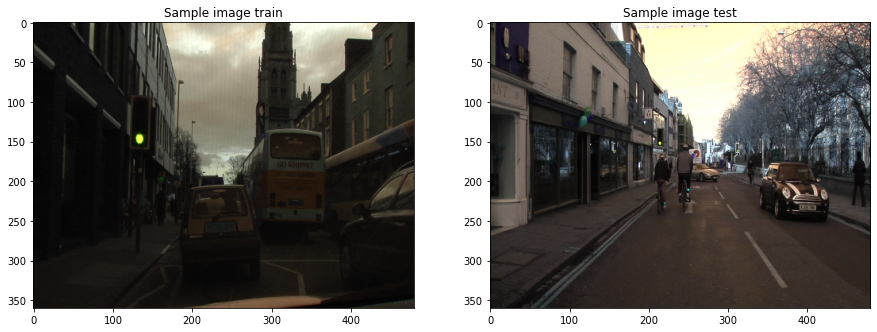

In [5]:
fig = plt.figure(figsize=(15, 7), facecolor='white')
ax = fig.add_subplot(1, 2, 1)
ax.imshow(img_train[0])
ax.set_title("Sample image train")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(img_test[0])
ax.set_title("Sample image test")

plt.show()

In [6]:
def toRGB(images):
    list_img_RGB = []
    for img in images:
        img_RGB = img[..., ::-1]
        list_img_RGB.append(img_RGB)
    return np.array(list_img_RGB)

In [7]:
img_train = toRGB(img_train)
img_test = toRGB(img_test)

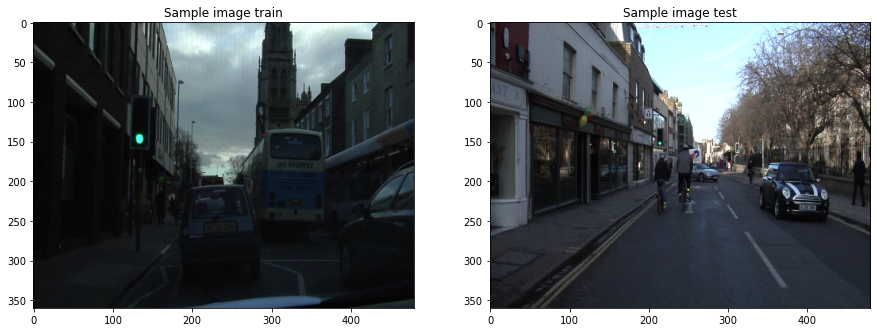

In [8]:
fig = plt.figure(figsize=(15, 7), facecolor='white')
ax = fig.add_subplot(1, 2, 1)
ax.imshow(img_train[0])
ax.set_title("Sample image train")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(img_test[0])
ax.set_title("Sample image test")

plt.show()

### Annotation

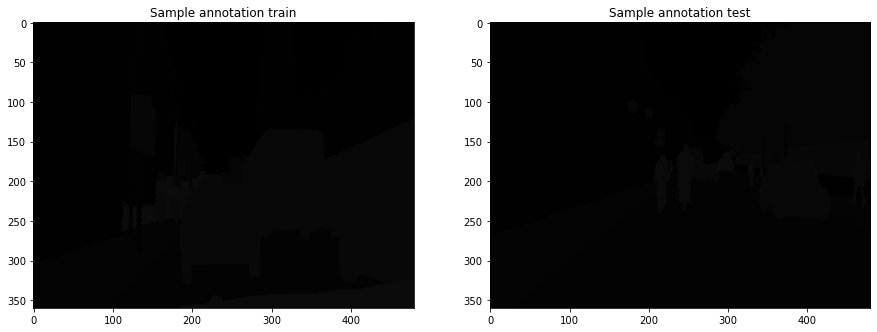

In [9]:
fig = plt.figure(figsize=(15, 7), facecolor='white')
ax = fig.add_subplot(1, 2, 1)
ax.imshow(annot_train[0])
ax.set_title("Sample annotation train")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(annot_test[0])
ax.set_title("Sample annotation test")

plt.show()

In [10]:
segm_names = [
    "Sky", "Building", "Pole", "Road", "Pavement", "Tree", "SignSymbol",
    "Fence", "Car", "Pedestrian", "Bicyclist", "Background"
]

In [11]:
print(np.unique(annot_train[0]))

[ 0  1  2  3  4  5  6  8  9 11]


In [12]:
def color_segm(seg, colors):
    seg_img = np.zeros_like(seg)
    for c in range(len(colors)):
        seg_img[:, :, 0] += ((seg[:, :, 0] == c) * (colors[c][0])).astype('uint8')
        seg_img[:, :, 1] += ((seg[:, :, 0] == c) * (colors[c][1])).astype('uint8')
        seg_img[:, :, 2] += ((seg[:, :, 0] == c) * (colors[c][2])).astype('uint8')
    return seg_img

In [13]:
colors = [
    (209, 229, 226),  # "Sky"
    (122, 118, 112),  # "Building"
    (183, 188, 170),  # "Pole"
    (56, 61, 72),  # "Road"
    (84, 80, 80),  # "Pavement"
    (114, 142, 120),  # "Tree"
    (220, 112, 117),  # "SignSymbol"
    (133, 102, 82),  # "Fence"
    (214, 143, 175),  # "Car"
    (143, 214, 151),  # "Pedestrian"
    (143, 170, 214),  # "Bicyclist"
    (0, 0, 0)  # Background
]

In [14]:
c_map = {}
for i in range(len(colors)):
    c = f'rgb{colors[i][0],colors[i][1],colors[i][2]}'
    c_map[segm_names[i]] = c
    
def styler(col):
    bg_color = col.map(c_map).fillna('')
    return 'background-color:' + bg_color

In [15]:
pd.DataFrame(segm_names,index=None,columns=['Warna Setiap Kelas']).style.apply(styler)

,Warna Setiap Kelas
0,Sky
1,Building
2,Pole
3,Road
4,Pavement
5,Tree
6,SignSymbol
7,Fence
8,Car
9,Pedestrian


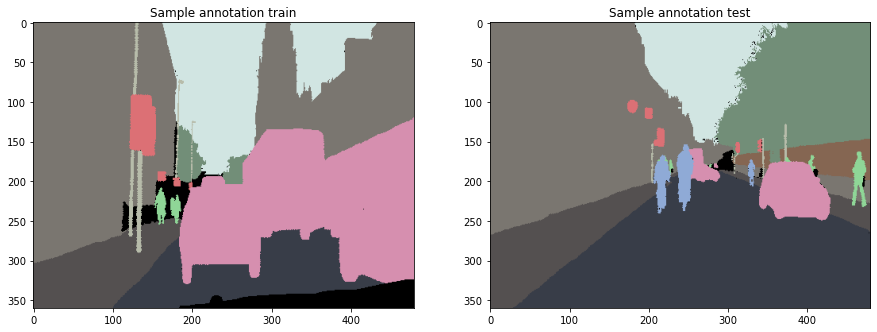

In [16]:
fig = plt.figure(figsize=(15, 7), facecolor='white')
ax = fig.add_subplot(1, 2, 1)
ax.imshow(color_segm(annot_train[0], colors))
ax.set_title("Sample annotation train")

ax = fig.add_subplot(1, 2, 2)
im = ax.imshow(color_segm(annot_test[0], colors))
ax.set_title("Sample annotation test")
plt.show()

In [17]:
fig.colorbar(im,cax=ax,orientation='horizontal')
plt.show()

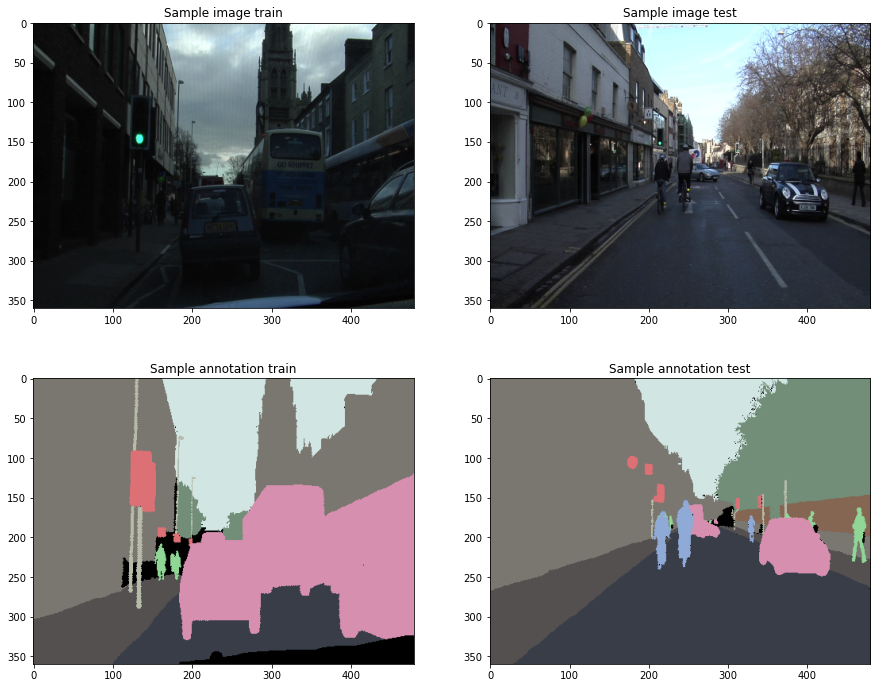

In [18]:
fig = plt.figure(figsize=(15, 12), facecolor='white')
ax = fig.add_subplot(2, 2, 1)
ax.imshow(img_train[0])
ax.set_title("Sample image train")

ax = fig.add_subplot(2, 2, 2)
ax.imshow(img_test[0])
ax.set_title("Sample image test")

ax = fig.add_subplot(2, 2, 3)
ax.imshow(color_segm(annot_train[0], colors))
ax.set_title("Sample annotation train")

ax = fig.add_subplot(2, 2, 4)
ax.imshow(color_segm(annot_test[0], colors))
ax.set_title("Sample annotation test")

plt.show()

## Processing Image

### Resize Image

In [19]:
def resize(images, img_size):
    list_img = []
    for img in images:
        resized_img = cv2.resize(img, (img_size, img_size))
        list_img.append(resized_img)

    return np.array(list_img)

In [20]:
img_train = resize(img_train, 224)
img_test = resize(img_test, 224)
annot_train = resize(annot_train, 224)
annot_test = resize(annot_test, 224)

In [21]:
print('image train shape:', img_train.shape)
print('image test shape:', img_test.shape)
print('annotation train shape:', annot_train.shape)
print('annotation test shape:', annot_test.shape)

image train shape: (367, 224, 224, 3)
image test shape: (101, 224, 224, 3)
annotation train shape: (367, 224, 224, 3)
annotation test shape: (101, 224, 224, 3)


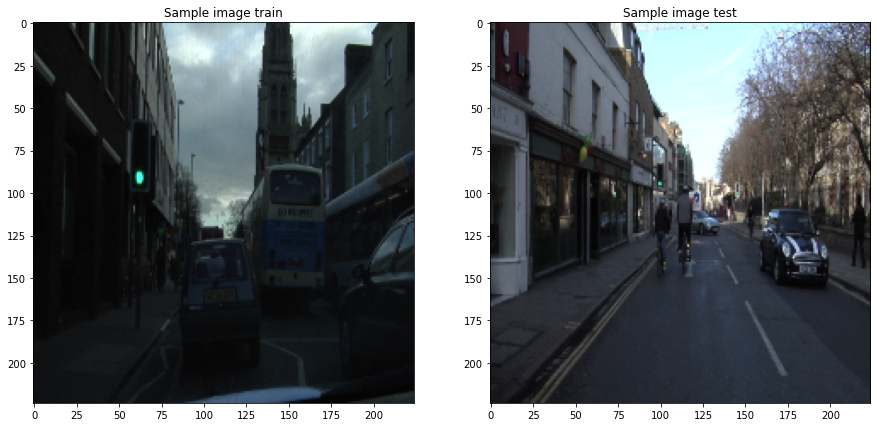

In [22]:
fig = plt.figure(figsize=(15, 7), facecolor='white')
ax = fig.add_subplot(1, 2, 1)
ax.imshow(img_train[0])
ax.set_title("Sample image train")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(img_test[0])
ax.set_title("Sample image test")

plt.show()

### Normalisasi Pixel Image

In [23]:
print(img_train[0,:,:,0])

[[16 13 14 ... 19 16 17]
 [14 14 12 ... 17 15 17]
 [12 14 14 ... 13 15 16]
 ...
 [15 16 16 ... 32 26 27]
 [16 15 16 ... 24 30 24]
 [15 16 16 ... 24 23 22]]


In [24]:
img_train = np.array(img_train) / 255
img_test = np.array(img_test) / 255

In [25]:
print(img_train[0,:,:,0])

[[0.0627451  0.05098039 0.05490196 ... 0.0745098  0.0627451  0.06666667]
 [0.05490196 0.05490196 0.04705882 ... 0.06666667 0.05882353 0.06666667]
 [0.04705882 0.05490196 0.05490196 ... 0.05098039 0.05882353 0.0627451 ]
 ...
 [0.05882353 0.0627451  0.0627451  ... 0.1254902  0.10196078 0.10588235]
 [0.0627451  0.05882353 0.0627451  ... 0.09411765 0.11764706 0.09411765]
 [0.05882353 0.0627451  0.0627451  ... 0.09411765 0.09019608 0.08627451]]


### Mengubah Anotasi ke Grayscale

In [26]:
def toGray(images):
    list_img_gray = []
    for img in images:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        list_img_gray.append(img_gray)
    return np.array(list_img_gray)

In [27]:
annot_train = toGray(annot_train)
annot_test = toGray(annot_test)

In [28]:
print('annotation train shape:', annot_train.shape)
print('annotation test shape:', annot_test.shape)

annotation train shape: (367, 224, 224)
annotation test shape: (101, 224, 224)


### One Hot Encoding

In [29]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [30]:
print('annotation train shape:', annot_train.shape)
print('annotation test shape:', annot_test.shape)

annotation train shape: (367, 224, 224)
annotation test shape: (101, 224, 224)


In [31]:
annot_train_ohe = to_categorical(annot_train)
annot_test_ohe = to_categorical(annot_test)

In [32]:
print('annotation train (ohe) shape:', annot_train_ohe.shape)
print('annotation test (ohe) shape:', annot_test_ohe.shape)

annotation train (ohe) shape: (367, 224, 224, 12)
annotation test (ohe) shape: (101, 224, 224, 12)


In [33]:
print(segm_names)

['Sky', 'Building', 'Pole', 'Road', 'Pavement', 'Tree', 'SignSymbol', 'Fence', 'Car', 'Pedestrian', 'Bicyclist', 'Background']


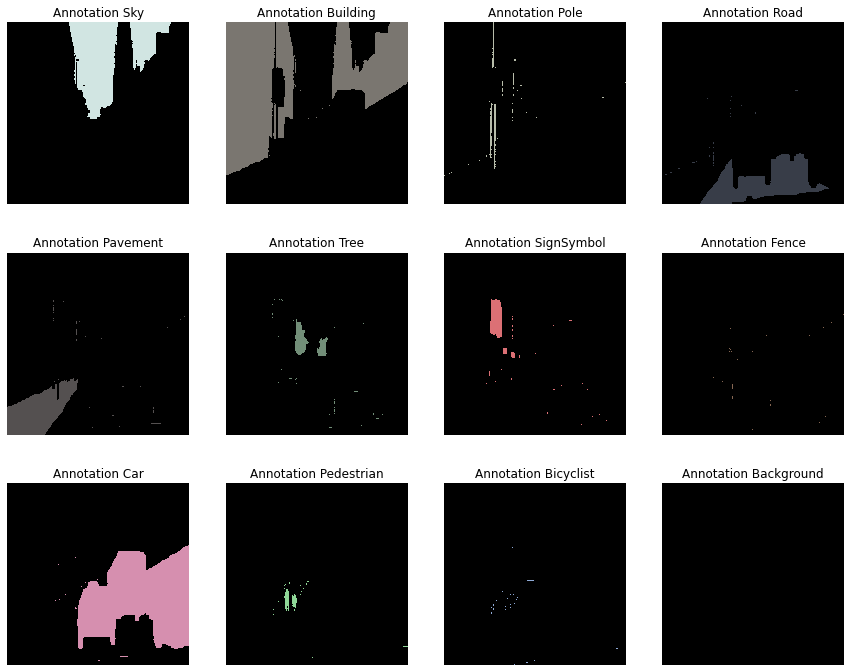

In [34]:
fig = plt.figure(figsize=(15, 12))


for i in range(annot_train_ohe[0].shape[2]):
    ax = fig.add_subplot(3, 4, i + 1)
    ax.set_title("Annotation {}".format(segm_names[i]))
    ax.axis('off')
    cmap = matplotlib.colors.ListedColormap([[0, 0, 0], [colors[i][0]/255, colors[i][1]/255, colors[i][2]/255]])
    ax.imshow(annot_train_ohe[0][:, :, i].astype(np.uint8),cmap=cmap)

## Modeling


In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, MaxPooling2D, Dropout, concatenate, Conv2DTranspose, add, BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
initializer = tf.keras.initializers.HeNormal()
from keras.metrics import MeanIoU

### Unet

In [37]:
def UNet(image_size, ch_in=3, ch_out=3):

    inputs = Input(shape=(*image_size, ch_in), name='input')

    # The contraction path
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)  # optional to tackle overfitting issue
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    # The bottleneck
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)  # optional to tackle overfitting issue

    # The expansion path
    up6 = Conv2D(512, 2, activation='relu',padding='same')(UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2D(256, 2, activation='relu',padding='same')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2D(128, 2, activation='relu',padding='same')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2D(64, 2, activation='relu',padding='same')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    conv9 = Conv2D(32, 3, activation='relu', padding='same')(conv9)
    conv10 = Conv2D(12, 1, activation='softmax')(conv9)

    outputs = conv10

    model = Model(inputs, outputs)

    return model

In [38]:
model = UNet(image_size=(224, 224))

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  1792        ['input[0][0]']                  
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 224, 224, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [41]:
print('image train shape:', img_train.shape)
print('image test shape:', img_test.shape)
print('annotation train shape:', annot_train_ohe.shape)
print('annotation test shape:', annot_test_ohe.shape)

image train shape: (367, 224, 224, 3)
image test shape: (101, 224, 224, 3)
annotation train shape: (367, 224, 224, 12)
annotation test shape: (101, 224, 224, 12)


In [ ]:
model = UNet(image_size=(224, 224))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(img_train,
                annot_train_ohe,
                validation_data=(img_test, annot_test_ohe),
                epochs=50,
                verbose=1,
                batch_size=5)

Epoch 1/50
74/74 [==============================] - 105s 1s/step - loss: 14.0883 - accuracy: 0.3955 - val_loss: 1.5137 - val_accuracy: 0.5650
Epoch 2/50
74/74 [==============================] - 65s 877ms/step - loss: 1.1133 - accuracy: 0.6690 - val_loss: 1.1914 - val_accuracy: 0.6078
Epoch 3/50
74/74 [==============================] - 65s 876ms/step - loss: 0.9932 - accuracy: 0.6811 - val_loss: 1.0634 - val_accuracy: 0.6270
Epoch 4/50
74/74 [==============================] - 65s 876ms/step - loss: 0.9022 - accuracy: 0.7085 - val_loss: 1.0276 - val_accuracy: 0.6109
Epoch 5/50
74/74 [==============================] - 65s 878ms/step - loss: 0.8410 - accuracy: 0.7256 - val_loss: 0.9859 - val_accuracy: 0.6455
Epoch 6/50
74/74 [==============================] - 65s 876ms/step - loss: 0.7604 - accuracy: 0.7642 - val_loss: 0.7937 - val_accuracy: 0.7841
Epoch 7/50
74/74 [==============================] - 65s 877ms/step - loss: 0.7170 - accuracy: 0.7823 - val_loss: 0.9150 - val_accuracy: 0.7084


In [50]:
# menyimpan model
import pickle
with open('CV_UNet', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)
model.save("CV_UNet.h5")

### FCN

In [42]:
def FCN_8s(image_size, ch_in=3, ch_out=3):
    inputs = Input(shape=(*image_size, ch_in), name='input')
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    
    conv5 = Conv2D(512, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, 3, activation='relu', padding='same')(conv5)
    conv5 = Conv2D(512, 3, activation='relu', padding='same')(conv5)
    pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)
    
    conv6 = Conv2D(filters=4096, kernel_size=7, padding='same', activation='relu')(pool5)
    drop6 = Dropout(0.5)(conv6)
    conv6 = Conv2D(filters=4096, kernel_size=1, padding='same', activation='relu')(drop6)
    drop6 = Dropout(0.5)(conv6)
    conv6 = Conv2D(filters=ch_out, kernel_size=1, padding='same', activation='softmax')(drop6)
    
    deconv7 = Conv2DTranspose(filters=ch_out, kernel_size=4, strides=2, use_bias=False, padding='same', activation='relu')(pool5)
    conv7_4 = Conv2D(filters=ch_out, kernel_size=1, padding='same', activation='softmax')(pool4)
    merge8 = add([deconv7, conv7_4])
    
    deconv8 = Conv2DTranspose(filters=ch_out, kernel_size=4, strides=2, use_bias=False, padding='same', activation='relu')(merge8)
    conv8_3 = Conv2D(filters=ch_out, kernel_size=1, padding='same', activation='softmax')(pool3)
    merge9 = add([deconv8, conv8_3])
    
    deconv10 = Conv2DTranspose(filters=ch_out, kernel_size=16, strides=8, padding='same', activation='softmax')(merge9)
    output = deconv10
    
    model = Model(inputs, output)

    return model

In [43]:
model = FCN_8s(image_size=(224, 224), ch_in=3, ch_out=12)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 224, 224, 64  1792        ['input[0][0]']                  
                                )                                                                 
                                                                                                  
 conv2d_25 (Conv2D)             (None, 224, 224, 64  36928       ['conv2d_24[0][0]']              
                                )                                                           

In [45]:
print('image train shape:', img_train.shape)
print('image test shape:', img_test.shape)
print('annotation train shape:', annot_train_ohe.shape)
print('annotation test shape:', annot_test_ohe.shape)

image train shape: (367, 224, 224, 3)
image test shape: (101, 224, 224, 3)
annotation train shape: (367, 224, 224, 12)
annotation test shape: (101, 224, 224, 12)


In [ ]:
model = FCN_8s(image_size=(224, 224), ch_in=3, ch_out=12)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(img_train,
                annot_train_ohe,
                validation_data=(img_test, annot_test_ohe),
                epochs=50,
                verbose=1,
                batch_size=16)

Epoch 1/50
23/23 [==============================] - 82s 4s/step - loss: 2.6005 - accuracy: 0.2310 - val_loss: 2.3808 - val_accuracy: 0.2209
Epoch 2/50
23/23 [==============================] - 82s 4s/step - loss: 2.4810 - accuracy: 0.2533 - val_loss: 2.2209 - val_accuracy: 0.2280
Epoch 3/50
23/23 [==============================] - 82s 4s/step - loss: 2.0379 - accuracy: 0.2791 - val_loss: 2.0410 - val_accuracy: 0.2928
Epoch 4/50
23/23 [==============================] - 85s 4s/step - loss: 1.8672 - accuracy: 0.3220 - val_loss: 1.8825 - val_accuracy: 0.2978
Epoch 5/50
23/23 [==============================] - 87s 4s/step - loss: 1.6995 - accuracy: 0.3242 - val_loss: 1.7867 - val_accuracy: 0.2988
Epoch 6/50
23/23 [==============================] - 92s 4s/step - loss: 1.6273 - accuracy: 0.3542 - val_loss: 1.6857 - val_accuracy: 0.3847
Epoch 7/50
23/23 [==============================] - 87s 4s/step - loss: 1.4242 - accuracy: 0.4947 - val_loss: 1.4686 - val_accuracy: 0.4600
Epoch 8/50
23/23 [==

In [50]:
# menyimpan model
import pickle
with open('CV_FCN8s', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)
model.save("CV_FCN8s.h5")

### SegNet

In [46]:
def SegNet(image_size, ch_in=3, ch_out=3):
    
    inputs = Input(shape=(*image_size, ch_in), name='input')

    conv1 = Conv2D(64, 3, activation='relu', padding='same', name='Block1')(inputs)
    batch1 = BatchNormalization()(conv1)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(batch1)
    batch1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(batch1)
    
    conv2 = Conv2D(128, 3, activation='relu', padding='same', name='Block2')(pool1)
    batch2 = BatchNormalization()(conv2)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(batch2)
    batch2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(batch2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same', name='Block3')(pool2)
    batch3 = BatchNormalization()(conv3)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(batch3)
    batch3 = BatchNormalization()(conv3)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(batch3)
    batch3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(batch3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same', name='Block4')(pool3)
    batch4 = BatchNormalization()(conv4)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(batch4)
    batch4 = BatchNormalization()(conv4)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(batch4)
    batch4 = BatchNormalization()(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(batch4)
    
    conv5 = Conv2D(512, 3, activation='relu', padding='same', name='Block5')(pool4)
    batch5 = BatchNormalization()(conv5)
    conv5 = Conv2D(512, 3, activation='relu', padding='same')(batch5)
    batch5 = BatchNormalization()(conv5)
    conv5 = Conv2D(512, 3, activation='relu', padding='same')(batch5)
    batch5 = BatchNormalization()(conv5)
    pool5 = MaxPooling2D(pool_size=(1,1))(batch5)
    
    unpool6 = Conv2DTranspose(512, 3, strides=1,  padding='same', activation='relu', name='Block6')(pool5)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(unpool6)
    batch6 = BatchNormalization()(conv6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(batch6)
    batch6 = BatchNormalization()(conv6)
    conv6 = Conv2D(256, 3, activation='relu', padding='same')(batch6)
    batch6 = BatchNormalization()(conv6)    
    
    unpool7 = Conv2DTranspose(512, 3, strides=2,  padding='same', activation='relu', name='Block7')(batch6)
    conv7 = Conv2D(512, 3, activation='relu', padding='same')(unpool7)
    batch7 = BatchNormalization()(conv7)
    conv7 = Conv2D(512, 3, activation='relu', padding='same')(batch7)
    batch7 = BatchNormalization()(conv7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(batch7)
    batch7 = BatchNormalization()(conv7)
    
    unpool8 = Conv2DTranspose(256, 3, strides=2,  padding='same', activation='relu', name='Block8')(batch7)
    conv8 = Conv2D(256, 3, activation='relu', padding='same')(unpool8)
    batch8 = BatchNormalization()(conv8)
    conv8 = Conv2D(256, 3, activation='relu', padding='same')(batch8)
    batch8 = BatchNormalization()(conv8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(batch8)
    batch8 = BatchNormalization()(conv8)
    
    unpool9 = Conv2DTranspose(256, 3, strides=2,  padding='same', activation='relu', name='Block9')(batch8)
    conv9 = Conv2D(128, 3, activation='relu', padding='same')(unpool9)
    batch9 = BatchNormalization()(conv9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(batch9)
    batch9 = BatchNormalization()(conv9)
    
    unpool10 = Conv2DTranspose(256, 3, strides=2,  padding='same', activation='relu', name='Block10')(batch9)
    conv10 = Conv2D(64, 3, activation='relu', padding='same')(unpool10)
    batch10 = BatchNormalization()(conv10)
    conv10 = Conv2D(ch_out, 1, activation='relu', padding='same')(batch10)
    batch10 = BatchNormalization()(conv10)
    
    output = Conv2D(ch_out, 1, activation='softmax')(batch10)
    
    model = Model(inputs, output)

    return model

In [47]:
model = SegNet(image_size=(224,224), ch_in=3, ch_out=12)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 Block1 (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_42 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 64)     0   

In [48]:
model = SegNet(image_size=(224,224), ch_in=3, ch_out=12)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(img_train,
                annot_train_ohe,
                validation_data=(img_test, annot_test_ohe),
                epochs=50,
                verbose=1,
                batch_size=16)

Epoch 1/50
23/23 [==============================] - 95s 3s/step - loss: 2.0605 - accuracy: 0.4234 - val_loss: 5113.6650 - val_accuracy: 0.2573
Epoch 2/50
23/23 [==============================] - 45s 2s/step - loss: 1.3235 - accuracy: 0.6776 - val_loss: 84.2633 - val_accuracy: 0.2532
Epoch 3/50
23/23 [==============================] - 45s 2s/step - loss: 1.1710 - accuracy: 0.7056 - val_loss: 105.9613 - val_accuracy: 0.2332
Epoch 4/50
23/23 [==============================] - 44s 2s/step - loss: 1.0529 - accuracy: 0.7295 - val_loss: 6.2527 - val_accuracy: 0.1692
Epoch 5/50
23/23 [==============================] - 44s 2s/step - loss: 0.9940 - accuracy: 0.7384 - val_loss: 236.3516 - val_accuracy: 0.1984
Epoch 6/50
23/23 [==============================] - 44s 2s/step - loss: 0.9376 - accuracy: 0.7469 - val_loss: 11.1742 - val_accuracy: 0.3040
Epoch 7/50
23/23 [==============================] - 44s 2s/step - loss: 0.8645 - accuracy: 0.7634 - val_loss: 4.4386 - val_accuracy: 0.3276
Epoch 8/50


In [50]:
# menyimpan model
import pickle
with open('CV_SegNet', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)
model.save("CV_SegNet.h5")

### Load Model

In [52]:
# membuka history
import pickle
history_Unet = pickle.load(open('CV_Unet_Colab_2', "rb"))
history_FCN8s  = pickle.load(open('CV_FCN8s_2', "rb"))
history_SegNet = pickle.load(open('CV_SegNet_colab_3', "rb"))
history = [history_Unet, history_FCN8s, history_SegNet]

In [53]:
# membuka model
model_Unet = keras.models.load_model("CV_Unet_colab_2.h5")
model_FCN8s = keras.models.load_model("CV_FCN8s_2.h5")
model_SegNet = keras.models.load_model("CV_SegNet_colab_3.h5")
model = [model_Unet,model_FCN8s,model_SegNet]

## Evaluation

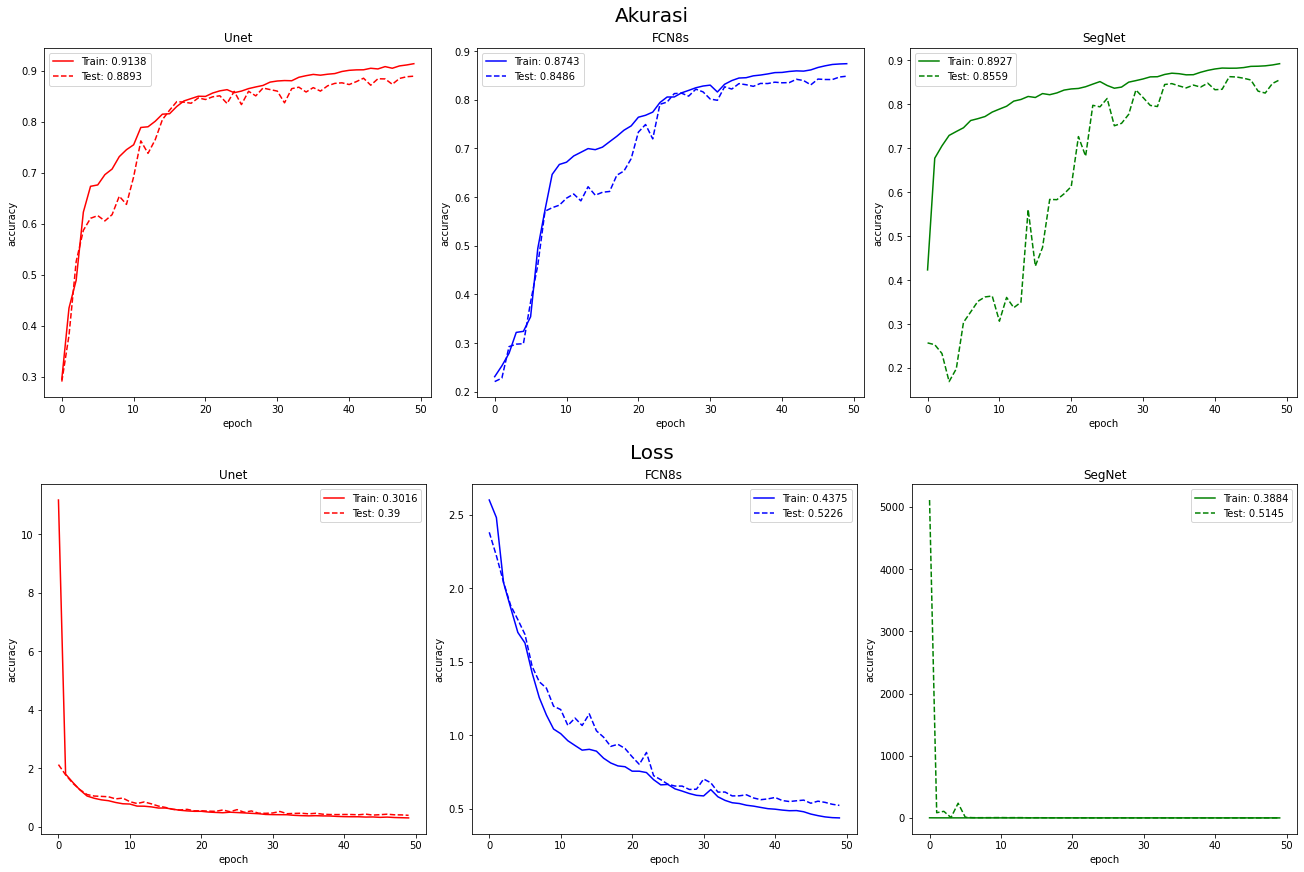

In [54]:
line_color = {'Unet':'r', 'FCN8s':'b', 'SegNet':'g'}

fig = plt.figure(constrained_layout=True, figsize=(18, 12), facecolor='white')
subfigs = fig.subfigures(2, 1)
subfigs[0].suptitle('Akurasi', fontsize=20)

for i in range(len(history)):
    ax = subfigs[0].add_subplot(1, 3, i+1)
    ax.plot(history[i]['accuracy'], list(line_color.values())[i])
    ax.plot(history[i]['val_accuracy'], list(line_color.values())[i]+'--')
    ax.legend(['Train: '+str(round(history[i]['accuracy'][-1],4)), 'Test: '+str(round(history[i]['val_accuracy'][-1],4))])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.title(list(line_color.keys())[i])

subfigs[1].suptitle('Loss', fontsize=20)
for i in range(len(history)):
    ax = subfigs[1].add_subplot(1, 3, i+1)
    ax.plot(history[i]['loss'], list(line_color.values())[i])
    ax.plot(history[i]['val_loss'], list(line_color.values())[i]+'--')
    ax.legend(['Train: '+str(round(history[i]['loss'][-1],4)), 'Test: '+str(round(history[i]['val_loss'][-1],4))])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.title(list(line_color.keys())[i])

In [55]:
def pred_annot(model,test):
    annot_pred_arr = model.predict(test)
    annot_pred = np.argmax(annot_pred_arr, axis=3)
    annot_pred_ohe = to_categorical(annot_pred) 
    return annot_pred, annot_pred_ohe

In [56]:
annot_pred_Unet, annot_pred_ohe_Unet = pred_annot(model[0],img_test)
annot_pred_FCN8s, annot_pred_ohe_FCN8s = pred_annot(model[1],img_test)
annot_pred_SegNet, annot_pred_ohe_SegNet = pred_annot(model[2],img_test)

In [57]:
def getMetric(annot_test, annot_pred,history):
    mIoU_keras = MeanIoU(num_classes=12)
    mIoU_keras.update_state(annot_test, annot_pred)
    
    metric = {
        'MeanIoU': mIoU_keras.result().numpy(),
        'Accuracy': round(history['accuracy'][-1],4),
        'Validation Accuracy': round(history['val_accuracy'][-1],4),
        'Loss': round(history['loss'][-1],4),
        'Validation Loss': round(history['val_loss'][-1],4)
    }
    
    return metric

In [60]:
metrics_model = {}
metrics_model['Unet'] = getMetric(annot_test, annot_pred_Unet, history_Unet)
metrics_model['FCN8s'] = getMetric(annot_test, annot_pred_FCN8s, history_FCN8s)
metrics_model['SegNet'] = getMetric(annot_test, annot_pred_SegNet, history_SegNet)

pd.DataFrame(metrics_model).transpose().sort_values('MeanIoU',ascending=False)

,MeanIoU,Accuracy,Validation Accuracy,Loss,Validation Loss
Unet,0.515388,0.9138,0.8893,0.3016,0.3900
SegNet,0.423981,0.8927,0.8559,0.3884,0.5145
FCN8s,0.406561,0.8743,0.8486,0.4375,0.5226


In [61]:
def IoU_class(annot_test_ohe,annot_pred_ohe,segm_names):
    iou = {}
    
    for c in range(len(segm_names)):
        key = f'Class {c} ({segm_names[c]})'
        inter = np.logical_and(annot_test_ohe[:,:,:,c], annot_pred_ohe[:,:,:,c])
        union = np.logical_or(annot_test_ohe[:,:,:,c], annot_pred_ohe[:,:,:,c])
        iou_score = np.sum(inter) / np.sum(union)
        iou[key] = iou_score
        
    return iou

In [62]:
IoU_model = {}
IoU_model['Unet'] = IoU_class(annot_test_ohe,annot_pred_ohe_Unet,segm_names)
IoU_model['FCN8s'] = IoU_class(annot_test_ohe,annot_pred_ohe_FCN8s,segm_names)
IoU_model['SegNet'] = IoU_class(annot_test_ohe,annot_pred_ohe_SegNet,segm_names)

pd.DataFrame(IoU_model).style.highlight_max(color = 'lightgreen', axis = 1)

,Unet,FCN8s,SegNet
Class 0 (Sky),0.934876,0.875926,0.899007
Class 1 (Building),0.818456,0.763405,0.766420
Class 2 (Pole),0.001871,0.000000,0.000000
Class 3 (Road),0.948900,0.911030,0.929037
Class 4 (Pavement),0.822195,0.709865,0.753042
Class 5 (Tree),0.855855,0.810616,0.808307
Class 6 (SignSymbol),0.100741,0.000000,0.000000
Class 7 (Fence),0.410149,0.275913,0.425863
Class 8 (Car),0.563029,0.437246,0.396491
Class 9 (Pedestrian),0.172877,0.005130,0.000000


In [63]:
cmap = []
for c in range(len(colors)):
    cmap.append([colors[c][0]/255, colors[c][1]/255, colors[c][2]/255])
cmap = matplotlib.colors.ListedColormap(cmap)

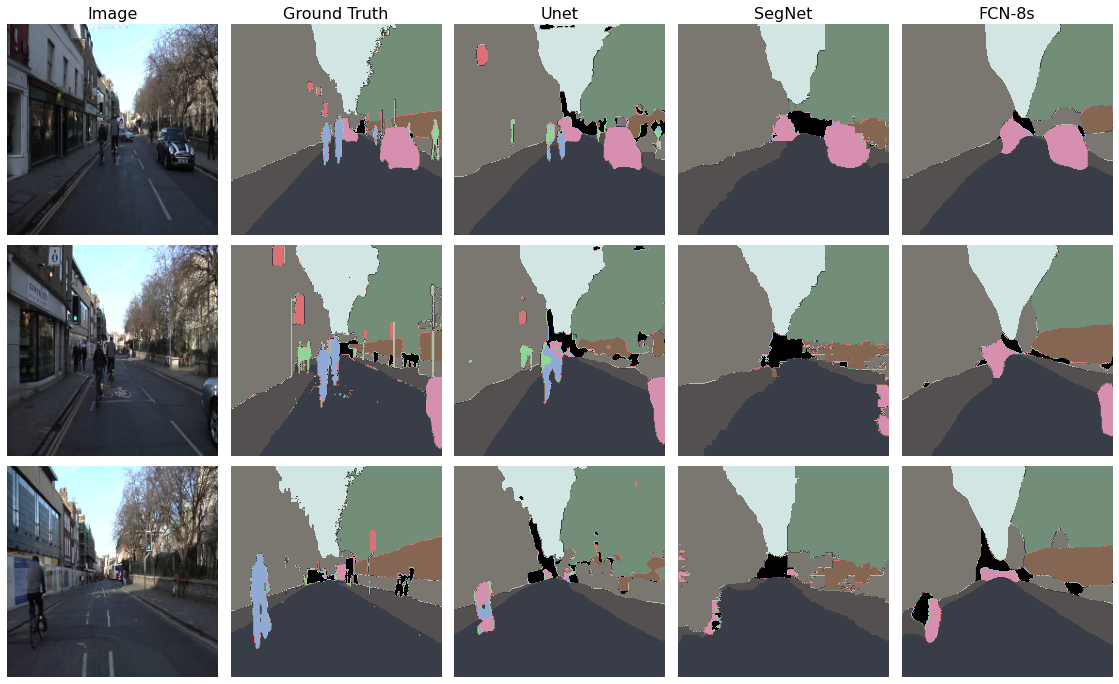

In [64]:
sample = [0,50,100]
fig = plt.figure(figsize=(20, 12), facecolor='white')
fig.subplots_adjust(wspace=0.01, hspace=0.05)
images = [img_test,annot_test,annot_pred_Unet,annot_pred_FCN8s,annot_pred_SegNet]
label = ['Image','Ground Truth', 'Unet', 'SegNet', 'FCN-8s']
n = 1
for i in range(3):
    for j in range(5):
        ax = fig.add_subplot(3, 5, n)
        ax.axis('off')
        if i == 0:
            ax.set_title(label[j], fontsize=16)
        if j == 0:
            ax.imshow(images[j][sample[i]])
        else:
            ax.imshow(images[j][sample[i]],cmap=cmap)
        n += 1